In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


Using cpu device


In [4]:
batch_size = 64

In [5]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 32),
            nn.Sigmoid(),
            nn.Linear(32, 32),
            nn.Sigmoid(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [6]:
X = np.random.uniform(0,1, size = (1000, 2))

In [7]:
y = X[:,0]**(0.6)*X[:,1]**(0.4)
y = y.reshape((1000,1))

In [8]:
torch_X = torch.from_numpy(X).float().to(device)
torch_y = torch.from_numpy(y).float().to(device)

In [9]:
NeuralNetwork().forward(torch_X)

tensor([[0.3955],
        [0.3926],
        [0.3919],
        [0.3919],
        [0.3948],
        [0.3903],
        [0.3957],
        [0.3937],
        [0.3923],
        [0.3931],
        [0.3944],
        [0.3955],
        [0.3958],
        [0.3951],
        [0.3959],
        [0.3905],
        [0.3931],
        [0.3905],
        [0.3962],
        [0.3925],
        [0.3956],
        [0.3958],
        [0.3931],
        [0.3946],
        [0.3961],
        [0.3904],
        [0.3951],
        [0.3932],
        [0.3948],
        [0.3952],
        [0.3909],
        [0.3941],
        [0.3910],
        [0.3931],
        [0.3943],
        [0.3953],
        [0.3963],
        [0.3951],
        [0.3938],
        [0.3912],
        [0.3956],
        [0.3952],
        [0.3962],
        [0.3962],
        [0.3941],
        [0.3920],
        [0.3904],
        [0.3905],
        [0.3931],
        [0.3943],
        [0.3947],
        [0.3908],
        [0.3954],
        [0.3951],
        [0.3948],
        [0

In [10]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [11]:
pred = model(torch_X)
loss = loss_fn(pred, torch_y)

In [12]:
loss

tensor(0.0626, grad_fn=<MseLossBackward0>)

In [125]:
# Define training function
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss occasionally
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Create dataloader
dataset = torch.utils.data.TensorDataset(torch_X, torch_y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

# Train model
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(dataloader, model, loss_fn, optimizer)
print("Done!")


Epoch 1
-------------------------------
loss: 0.030714  [    0/10000]
loss: 0.019470  [ 6400/10000]
Epoch 2
-------------------------------
loss: 0.038792  [    0/10000]
loss: 0.020801  [ 6400/10000]
Epoch 3
-------------------------------
loss: 0.040234  [    0/10000]
loss: 0.021377  [ 6400/10000]
Epoch 4
-------------------------------
loss: 0.040759  [    0/10000]
loss: 0.021571  [ 6400/10000]
Epoch 5
-------------------------------
loss: 0.040904  [    0/10000]
loss: 0.021617  [ 6400/10000]
Epoch 6
-------------------------------
loss: 0.040914  [    0/10000]
loss: 0.021608  [ 6400/10000]
Epoch 7
-------------------------------
loss: 0.040877  [    0/10000]
loss: 0.021581  [ 6400/10000]
Epoch 8
-------------------------------
loss: 0.040826  [    0/10000]
loss: 0.021549  [ 6400/10000]
Epoch 9
-------------------------------
loss: 0.040770  [    0/10000]
loss: 0.021515  [ 6400/10000]
Epoch 10
-------------------------------
loss: 0.040713  [    0/10000]
loss: 0.021481  [ 6400/10000]

In [126]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

In [127]:
import itertools
xy = np.array(list(itertools.product(x,y)))

In [128]:
torch_xy = torch.from_numpy(xy).float().to(device)

In [129]:
output = model(torch_xy).cpu().detach().numpy()

In [130]:
output

array([[-0.07597013],
       [-0.0705304 ],
       [-0.06511374],
       ...,
       [ 1.0389739 ],
       [ 1.0468588 ],
       [ 1.0547278 ]], dtype=float32)

In [131]:
df = pd.DataFrame(xy)
df['output'] = output
df = df.pivot(index = 0, columns = 1, values = 'output')

In [132]:
import seaborn as sns

<Axes: xlabel='1', ylabel='0'>

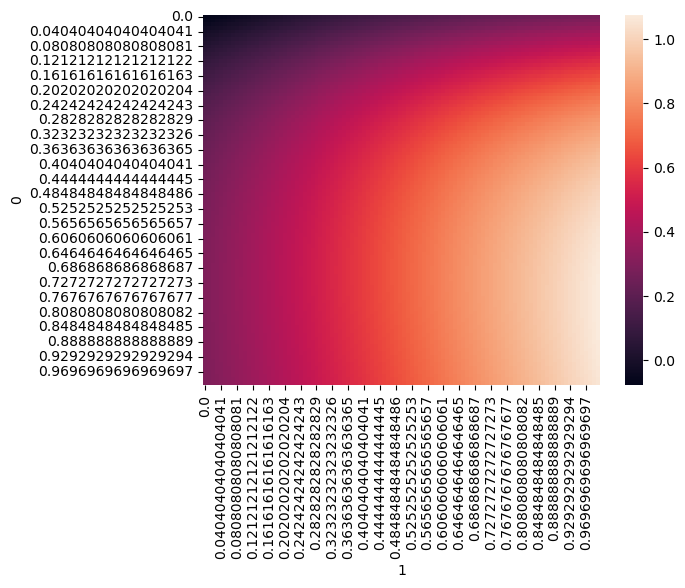

In [133]:
sns.heatmap(df)

Now what if we introduce a shock, and retrain our function. Then we should have, across the K/L a sort of "bump". 

Now retrain the function with a local shock, and see what happens.

In [134]:
X = np.random.uniform(0,1, size = (10000, 2))
y = np.where(np.logical_and(X[:,0]/X[:,1] > 0.3, X[:,0]/X[:,1] < 0.5), 3*X[:,0]**(0.6)*X[:,1]**(0.4), X[:,0]**(0.6)*X[:,1]**(0.4))
y = y.reshape((10000,1))
torch_X = torch.from_numpy(X).float().to(device)
torch_y = torch.from_numpy(y).float().to(device)

In [135]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

In [136]:
X, Y = np.meshgrid(x, y)

In [137]:
X.shape

(100, 100)

In [138]:
output = output.reshape((100,100))

In [139]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

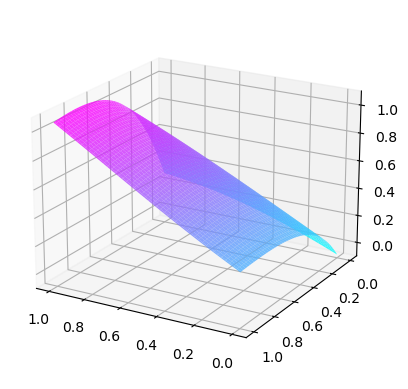

In [150]:
import numpy as np
import matplotlib.pyplot as plt
 
 
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, output, cmap='cool', alpha=0.8)
ax.view_init(20, 120)